# P1 - Identificando personas desde una imagen de su cara

Elaborado por GRUPO 1:

- Juanita Piraban Barbosa - 201216313
- Lorena Morales Rodríguez - 202027957
- Alejandro Barinas Guio - 201628859
- Jaime Humberto Trujillo Perea - 201920366
- Alexander Zapata Galindo - 201425426

In [24]:
# Libraries
from sklearn.datasets import fetch_lfw_people
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from keras import models
from keras import layers

import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import scikitplot as skplt

from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
# DataSet : “Labeled Faces in the Wild”
min_faces_per_person = 50 # número mínimo de fotos por personaje para filtrar la base
lfw_people = fetch_lfw_people(min_faces_per_person=min_faces_per_person, resize=0.4)

In [3]:
# Images
lfw_people.images.shape

(1560, 50, 37)

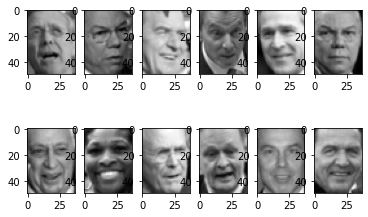

In [4]:
# Some examples
plt.subplot(2,6,1)
plt.imshow(lfw_people.images[2], cmap=plt.get_cmap('gray'))
plt.subplot(2,6,2)
plt.imshow(lfw_people.images[8], cmap=plt.get_cmap('gray'))
plt.subplot(2,6,3)
plt.imshow(lfw_people.images[29], cmap=plt.get_cmap('gray'))
plt.subplot(2,6,4)
plt.imshow(lfw_people.images[0], cmap=plt.get_cmap('gray'))
plt.subplot(2,6,5)
plt.imshow(lfw_people.images[4], cmap=plt.get_cmap('gray'))
plt.subplot(2,6,6)
plt.imshow(lfw_people.images[32], cmap=plt.get_cmap('gray'))
plt.subplot(2,6,7)
plt.imshow(lfw_people.images[6], cmap=plt.get_cmap('gray'))
plt.subplot(2,6,8)
plt.imshow(lfw_people.images[24], cmap=plt.get_cmap('gray'))
plt.subplot(2,6,9)
plt.imshow(lfw_people.images[25], cmap=plt.get_cmap('gray'))
plt.subplot(2,6,10)
plt.imshow(lfw_people.images[697], cmap=plt.get_cmap('gray'))
plt.subplot(2,6,11)
plt.imshow(lfw_people.images[13], cmap=plt.get_cmap('gray'))
plt.subplot(2,6,12)
plt.imshow(lfw_people.images[666], cmap=plt.get_cmap('gray'))
plt.show()


In [5]:
# images and labels
X = lfw_people.images
y = lfw_people.target
target_names = lfw_people.target_names

In [6]:
target_names[2:10]

array(['Donald Rumsfeld', 'George W Bush', 'Gerhard Schroeder',
       'Hugo Chavez', 'Jacques Chirac', 'Jean Chretien', 'John Ashcroft',
       'Junichiro Koizumi'], dtype='<U17')

In [7]:
X.shape

(1560, 50, 37)

In [8]:
y.shape

(1560,)

In [10]:
# split into a training and testing set
X_train_image, X_test_image, y_train_labels, y_test_labels = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [11]:
#shape train
print(X_train_image.shape)
n_train=X_train_image.shape[0]

(1170, 50, 37)


In [12]:
#shape test
print(X_test_image.shape)
n_test=X_test_image.shape[0]

(390, 50, 37)


In [13]:
# Transformation
X_train_image = X_train_image.reshape((n_train, 50 * 37))
X_train_image = X_train_image.astype('float32') / 255
X_test_image = X_test_image.reshape((n_test, 50 * 37))
X_test_image = X_test_image.astype('float32') / 255

In [15]:
# Categorization 
y_train_labels = to_categorical(y_train_labels)
y_test_labels = to_categorical(y_test_labels)

In [16]:
y_train_labels.shape

(1170, 12, 2)

In [17]:
y_test_labels.shape

(390, 12, 2)

### MODELO 1 - NN

In [ ]:
# model compilation
model_1 = models.Sequential()
model_1.add(layers.Dense(1850, activation='relu', input_shape=(50 * 37,)))
model_1.add(layers.Dense(144, activation='sigmoid'))
model_1.add(layers.Dense(12, activation='softmax'))
model_1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# fit model
model_1.fit(X_train_image, y_train_labels, epochs=150, batch_size=256)

In [ ]:
# model's performance on test set
test_loss, test_acc = model_1.evaluate(X_test_image, y_test_labels)

### MODELO 2 - PCA

In [ ]:
# some definitions
n_components = 150
n_samples,h,w =lfw_people.images.shape
n_classes=target_names.shape[0]

# data and labels
X=lfw_people.data
y=lfw_people.target

# train/test split
X_train_image, X_test_image, y_train_labels, y_test_labels = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [ ]:
# model
pca = PCA(n_components=n_components,svd_solver='randomized',whiten=True).fit(X_train_image)
eigenfaces=pca.components_.reshape((n_components,h,w))

In [ ]:
# data transformation
X_train_pca=pca.transform(X_train_image)
X_test_pca=pca.transform(X_test_image)

In [ ]:
# fit model
param_grid ={'C':[1e3,5e3,1e4,5e4,1e5],'gamma':[0.0001,0.0005,0.001,0.005,0.01,0.1],}
clf=GridSearchCV(SVC(kernel='rbf',class_weight='balanced'),param_grid)
clf=clf.fit(X_train_pca,y_train_labels)

In [ ]:
print("Best estimator found by grid search:")
print(clf.best_estimator_)

In [ ]:
# predict
y_pred=clf.predict(X_test_pca)

In [ ]:
# model's performance on test set
print(classification_report(y_test_labels,y_pred,target_names=target_names))
print(confusion_matrix(y_test_labels,y_pred,labels=range(n_classes)))

### MODELO 3 - LOGISTIC REGRESION

In [18]:

lfw_people = fetch_lfw_people(min_faces_per_person=40, resize=0.5)
n_samples, h, w = lfw_people.images.shape

X = lfw_people.data
n_features = X.shape[1]

y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]
print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1867
n_features: 2914
n_classes: 19


In [19]:
# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#### Tuning parameters Logistic regresion:

* Paramter C as our regularization parameter. Parameter C = 1/λ.
Lambda (λ) controls the trade-off between allowing the model to increase it's complexity as much as it wants with trying to keep it simple. For example, if λ is very low or 0, the model will have enough power to increase it's complexity (overfit) by assigning big values to the weights for each parameter. If, in the other hand, we increase the value of λ, the model will tend to underfit, as the model will become too simple.
Parameter C will work the other way around. For small values of C, we increase the regularization strength which will create simple models which underfit the data. For big values of C, we low the power of regularization which imples the model is allowed to increase it's complexity, and therefore, overfit the data.

* Penalty parameter refer to L1, L2 and Elastic-Net penalty. Ridge and Lasso regularizations are also known as ‘shrinkage’ methods, because they reduce or shrink the coefficients in the resulting regression. This reduces the variance in the model: as input variables are changed, the model’s prediction changes less than it would have without the regularization. Why would you want to reduce the variance of a model? To avoid overfit.


In [20]:
# Fit model
#Logistic Regression requires two parameters 'C' and 'penalty' to be optimised by GridSearchCV
#param = {'C': [1e1,1e2,1e3,1e4,1e5], 'max_iter':[50,100,500,1000]}
param = {'C': [1e3], 'max_iter':[1000]}
clf = GridSearchCV(LogisticRegression(fit_intercept=False,multi_class='ovr'),param, cv=5)
model_logg = clf.fit(X_train,y_train)
print(model_logg.best_estimator_)

LogisticRegression(C=1000.0, fit_intercept=False, max_iter=1000,
                   multi_class='ovr')


In [21]:
print("tuned hpyerparameters :(best parameters) ",model_logg.best_params_)
print("accuracy :",model_logg.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'max_iter': 1000}
accuracy : 0.7220331754618302


In [22]:
# print("logistic regression")
ypred = model_logg.predict(X_test)
print(classification_report(y_test,ypred,target_names=target_names))

                           precision    recall  f1-score   support

             Ariel Sharon       0.56      0.64      0.60        14
    Arnold Schwarzenegger       0.71      0.42      0.53        12
             Colin Powell       0.85      0.88      0.87        52
          Donald Rumsfeld       0.79      0.73      0.76        30
            George W Bush       0.83      0.91      0.86       106
        Gerhard Schroeder       0.53      0.50      0.51        20
  Gloria Macapagal Arroyo       0.86      0.75      0.80         8
              Hugo Chavez       0.80      0.57      0.67        14
           Jacques Chirac       0.71      0.62      0.67         8
            Jean Chretien       0.70      0.64      0.67        11
        Jennifer Capriati       1.00      0.17      0.29         6
            John Ashcroft       0.71      0.50      0.59        10
        Junichiro Koizumi       0.91      0.83      0.87        12
               Laura Bush       0.88      0.78      0.82     

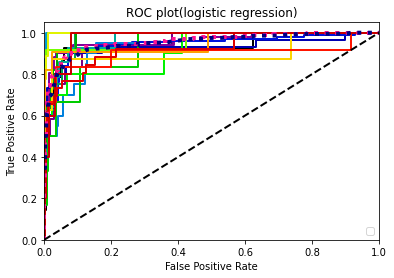

In [25]:
# ROC curve

y_probas = model_logg.predict_proba(X_test)
skplt.metrics.plot_roc(y_test,y_probas,title="ROC plot(logistic regression)")
plt.legend('')
plt.show()

### MODELO 4 - SVM SUPPORT VECTOR MACHINE


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_lfw_people
from sklearn.datasets import fetch_lfw_pairs
from matplotlib import pyplot as plt
from sklearn import svm
from PIL import Image
import numpy as np
import random

import tensorflow_datasets as tfds
import tensorflow as tf
tf.test.gpu_device_name()

''

In [28]:
# data
data=fetch_lfw_people(resize=0.4,min_faces_per_person=40,funneled=True)

l=list(data.keys())
X=data[l[0]]
Y=data[l[2]]
target_name=data[l[3]]

_,W,H=data[l[1]].shape
features=X.shape[1]
m=X.shape[0]
classes=data[l[3]].shape[0]

print("Samples:",m)
print("Features:",features)
print("Classes:",classes)
print("Dimension:",(W,H))

Samples: 1867
Features: 1850
Classes: 19
Dimension: (50, 37)


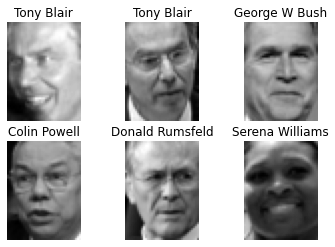

In [29]:
# Sample Images"""

for i in range(6):
  img=X[i,:]
  img=img.reshape(W,H)
  plt.subplot(2,3,i+1)
  plt.title(target_name[Y[i]])
  plt.imshow(img,cmap='gray')
  plt.axis('off')
plt.show()



In [30]:
# Shuffling the data

temp=list(zip(X,Y)) 
random.shuffle(temp) 
X,Y=zip(*temp)

X=np.array(X)
Y=np.array(Y)

In [31]:
# Train and test splitting of data
training_data_X,testing_data_X,training_data_Y,testing_data_Y=train_test_split(X,Y,test_size=0.20,random_state=42)

In [32]:
# Linear SVM

svm_linear=svm.SVC(kernel='linear',probability=True)
svm_linear=svm_linear.fit(training_data_X,training_data_Y)

print(svm_linear.score(testing_data_X,testing_data_Y)*100)

74.33155080213903


In [33]:
# RBF SVM

svm_rbf=svm.SVC(kernel='rbf',gamma='scale',C=10,probability=True)
svm_rbf=svm_rbf.fit(training_data_X,training_data_Y)

print(svm_rbf.score(testing_data_X,testing_data_Y)*100)

74.8663101604278


In [34]:
# Quadratic SVM

svm_quad=svm.SVC(kernel='poly',degree=2,gamma='scale',probability=True)
svm_quad=svm_quad.fit(training_data_X,training_data_Y)

print(svm_quad.score(testing_data_X,testing_data_Y)*100)

73.79679144385027


In [36]:
# Classification Report

y_pred=svm_linear.predict(testing_data_X)
print(classification_report(testing_data_Y,y_pred,target_names=target_name))

y_pred=svm_rbf.predict(testing_data_X)
print(classification_report(testing_data_Y,y_pred,target_names=target_name))

y_pred=svm_quad.predict(testing_data_X)
print(classification_report(testing_data_Y,y_pred,target_names=target_name))

                           precision    recall  f1-score   support

             Ariel Sharon       0.72      0.76      0.74        17
    Arnold Schwarzenegger       0.50      0.67      0.57         6
             Colin Powell       0.81      0.79      0.80        48
          Donald Rumsfeld       0.68      0.78      0.72        27
            George W Bush       0.81      0.89      0.85       108
        Gerhard Schroeder       0.59      0.59      0.59        22
  Gloria Macapagal Arroyo       1.00      1.00      1.00         8
              Hugo Chavez       0.77      0.48      0.59        21
           Jacques Chirac       0.69      0.82      0.75        11
            Jean Chretien       0.62      0.62      0.62         8
        Jennifer Capriati       0.33      0.12      0.18         8
            John Ashcroft       0.67      0.55      0.60        11
        Junichiro Koizumi       0.89      0.89      0.89         9
               Laura Bush       0.86      0.75      0.80     

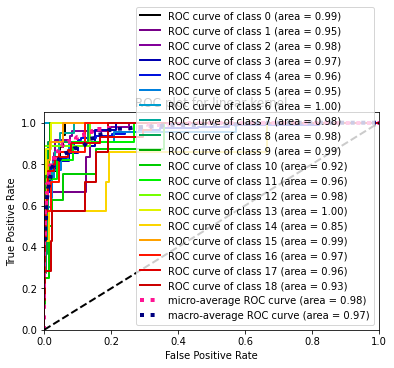

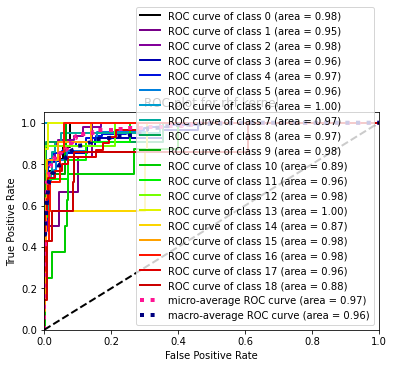

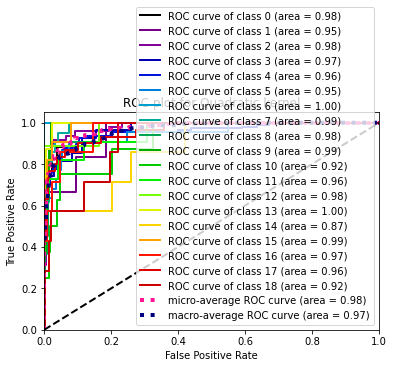

In [37]:
# ROC Curve

!pip install scikit-plot
import matplotlib.pyplot as plt
import scikitplot as skplt

predict_l=svm_linear.predict_proba(testing_data_X)
predict_rbf=svm_rbf.predict_proba(testing_data_X)
predict_q=svm_quad.predict_proba(testing_data_X)

skplt.metrics.plot_roc(testing_data_Y,predict_l,title="ROC plot for linear kernel")
#plt.savefig('/content/drive/My Drive/Jupyter/linear.png')
#plt.legend('')
plt.show()

skplt.metrics.plot_roc(testing_data_Y,predict_rbf,title="ROC plot for rbf kernel")
#plt.savefig('/content/drive/My Drive/Jupyter/rbf.png')
#plt.legend('')
plt.show()

skplt.metrics.plot_roc(testing_data_Y,predict_q,title="ROC plot for Quadratic kernel")
#plt.savefig('/content/drive/My Drive/Jupyter/quadratic.png')
#plt.legend('')
plt.show()

### BIBLIOGRAFÍA

https://www.kaggle.com/joparga3/2-tuning-parameters-for-logistic-regression

https://www.projectpro.io/recipes/optimize-hyper-parameters-of-logistic-regression-model-using-grid-search-in-python

https://github.com/harshitrai17152/Labeled-Faces-in-the-Wild.git
    